# Assignment 4

## 4.1 Using a CNN to Classify Clothes
Zalando has released a so-called plug-in replacement for the MNIST dataset. Instead of handwritten digits, the dataset consists of grayscale images showing different kinds of apparel. The dataset is built into
Keras and can be obtained using the function tf.keras.datasets.fashion_mnist.load_data().
We want to find out how well the CNN used in Chapter 4.4 works for classifying clothes.

(a) Modify the code to use the plug-in replacement dataset instead of the original MNIST dataset
and determine the accuracy on the test data.

(b) Determine for each of the ten classes the five most prototypical images. That is, you should
look for images for which the probability of belonging to the specific class is largest.

(c) Determine the images that are most confusing for the classifier. You may again use the entropy
over the class probabilities as in Assignment 3.


In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# reshape and normalize the data
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

# one-hot encode the class labels (0-9)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', strides=(1,1), padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

Class 0: 
121
1.0
[1.0000000e+00 4.7628001e-17 4.8880295e-09 1.2407136e-15 3.9756166e-16
 8.1205386e-19 4.6511026e-10 3.9860260e-20 6.4144045e-17 7.2993760e-23]


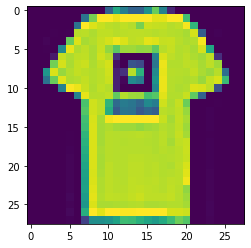

489
1.0
[1.0000000e+00 3.6528096e-25 1.4277098e-11 1.4307147e-21 3.4457097e-21
 2.9232305e-22 2.9525474e-15 3.2844510e-26 2.7410371e-20 4.2536216e-27]


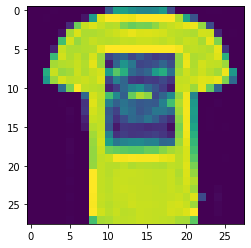

1412
1.0
[1.0000000e+00 1.8297249e-27 1.0732579e-13 3.3524337e-22 4.1643023e-21
 1.9564676e-19 1.4329744e-12 3.2117377e-24 2.5682143e-22 1.5034144e-28]


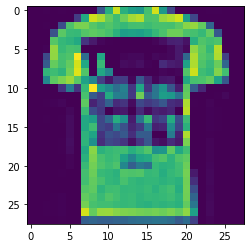

1999
1.0
[1.0000000e+00 2.6221948e-16 2.9302624e-08 1.5632872e-11 1.2342989e-14
 3.2946590e-15 2.9018790e-09 7.6832522e-16 4.3490458e-13 6.3476575e-18]


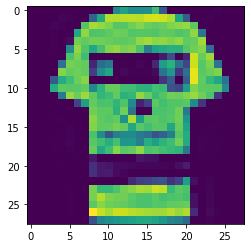

2446
1.0
[1.0000000e+00 1.0743418e-16 4.9810382e-08 3.6911477e-10 3.4320857e-14
 1.9703323e-14 1.3400401e-08 8.5081788e-18 7.6330342e-16 3.4913444e-21]


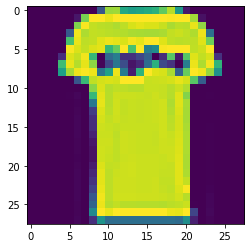

2723
1.0
[1.0000000e+00 4.0963744e-16 1.9106927e-09 2.8091228e-13 3.9802528e-12
 6.7897353e-13 2.6764853e-08 5.2671003e-15 1.0682889e-13 1.5434798e-16]


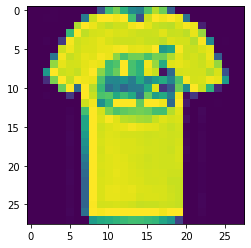

Class 1: 
2
1.0
[4.6269530e-15 1.0000000e+00 1.1933596e-16 2.4852984e-15 3.5298258e-17
 8.5972007e-21 3.9332754e-15 2.3845246e-22 6.0114234e-18 4.4710716e-21]


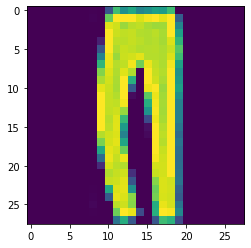

3
1.0
[2.03858024e-15 1.00000000e+00 4.84690034e-21 8.74725368e-14
 4.51227580e-15 4.52846644e-23 1.10491696e-14 4.57897616e-25
 9.06656897e-22 5.62618112e-25]


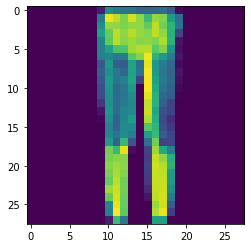

5
1.0
[8.8289687e-10 1.0000000e+00 2.0906570e-11 4.9678006e-16 2.7556263e-16
 2.6976796e-18 1.0119040e-14 3.1112775e-21 3.3159174e-15 1.6686862e-20]


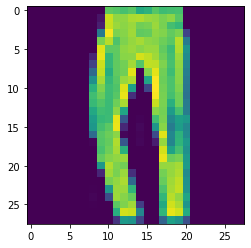

24
1.0
[2.2944903e-12 1.0000000e+00 1.1368472e-13 8.7963178e-12 3.4219624e-13
 1.8986349e-17 6.3074085e-14 7.0458867e-19 1.9251117e-14 3.2018251e-19]


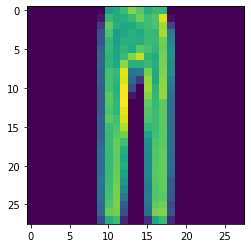

41
1.0
[1.7645173e-18 1.0000000e+00 6.4972388e-20 8.7094520e-24 6.6832291e-22
 8.4509182e-27 8.6225798e-23 1.2728034e-31 7.2454625e-26 4.1939175e-31]


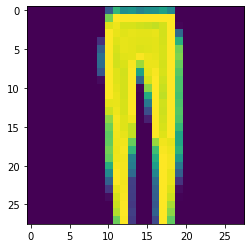

47
1.0
[8.6707992e-09 1.0000000e+00 1.2646523e-10 1.8851467e-09 2.4449704e-12
 4.2689275e-15 2.3298077e-10 4.3845325e-18 2.4075147e-12 5.1246300e-18]


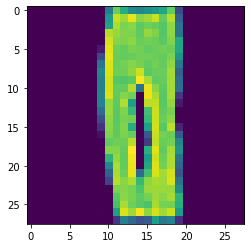

Class 2: 
9755
1.0
[1.0814070e-10 6.5604754e-27 1.0000000e+00 1.9397617e-19 1.6340129e-12
 1.4301836e-16 2.0211601e-09 3.0049807e-19 3.4043019e-16 2.3444208e-17]


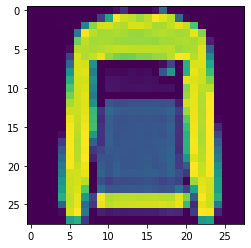

367
0.9999999
[7.8437331e-08 3.8333293e-13 9.9999988e-01 9.6739006e-12 4.4998892e-08
 1.7726142e-13 2.0798407e-09 9.9693432e-15 7.9816838e-09 1.6444609e-13]


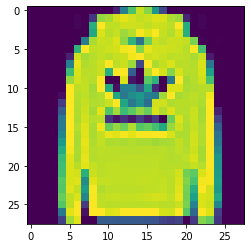

949
0.99999976
[2.7039244e-09 1.6874759e-25 9.9999976e-01 1.7603965e-17 8.7750750e-14
 2.7029488e-21 2.3522212e-07 8.0930111e-27 3.6317348e-23 1.1925712e-25]


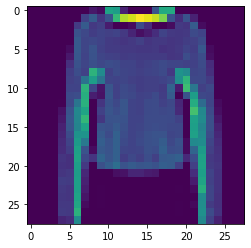

3358
0.99999976
[2.4490484e-07 3.2452238e-16 9.9999976e-01 4.1338842e-12 1.4637182e-10
 1.4471079e-16 8.7128682e-10 2.4804435e-19 3.5380924e-15 8.6254338e-17]


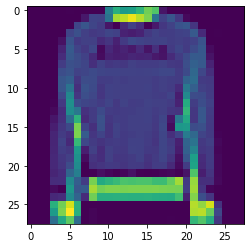

5068
0.99999976
[2.4735419e-07 2.5522604e-18 9.9999976e-01 8.5363839e-13 2.5793168e-08
 1.1110796e-13 3.0048135e-08 5.1405328e-16 5.0196690e-13 5.3191323e-15]


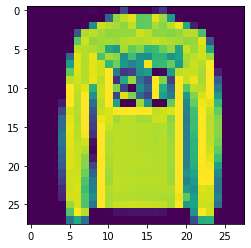

6942
0.99999976
[1.6125142e-07 4.6202786e-10 9.9999976e-01 1.3817499e-11 6.8875515e-08
 1.1632339e-13 1.7557737e-08 6.6672279e-17 2.2995282e-12 2.3981051e-16]


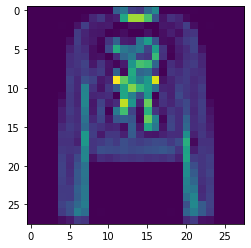

Class 3: 
1578
1.0
[4.8729476e-10 1.7820759e-13 1.5612171e-10 1.0000000e+00 2.3238005e-16
 6.5087129e-16 3.1021830e-09 5.4493637e-16 1.6086077e-14 4.4073766e-16]


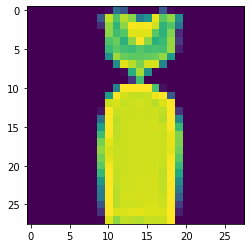

2275
1.0
[5.6220149e-08 1.0336745e-10 1.1661049e-12 1.0000000e+00 2.2133981e-15
 1.1120461e-14 6.2204686e-10 2.8719116e-14 7.2235112e-14 1.9217493e-16]


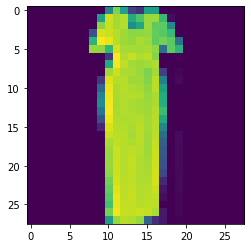

4147
1.0
[1.6627274e-11 4.8208676e-08 2.8701420e-11 1.0000000e+00 1.6682110e-10
 2.6137201e-13 1.4609134e-09 5.8883731e-15 2.1378088e-14 3.9046003e-16]


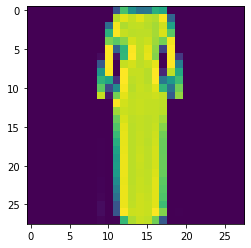

4175
1.0
[4.1266675e-09 2.4362059e-15 9.9689312e-10 1.0000000e+00 4.5198179e-09
 1.6270729e-14 3.6729269e-08 1.6151624e-14 7.2324408e-15 6.2805116e-16]


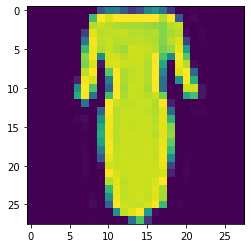

4964
1.0
[1.0914738e-10 4.1880091e-09 1.1142202e-14 1.0000000e+00 4.9158309e-11
 1.2052546e-12 4.5017882e-11 1.2709355e-16 6.0492914e-13 4.2095403e-18]


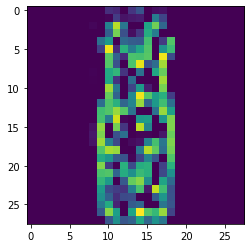

5099
1.0
[2.6694659e-11 5.0662125e-14 5.3822187e-17 1.0000000e+00 1.2793256e-17
 3.2854076e-16 6.2995738e-09 1.4524722e-17 4.5552731e-14 6.3645816e-18]


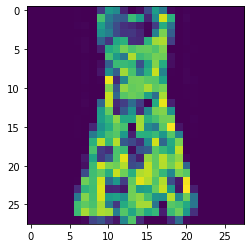

Class 4: 
4464
1.0
[5.4501669e-19 1.3741485e-20 6.8243211e-10 2.1258631e-21 1.0000000e+00
 1.0387064e-21 1.7449313e-11 1.0235480e-27 9.0556373e-24 2.7605520e-22]


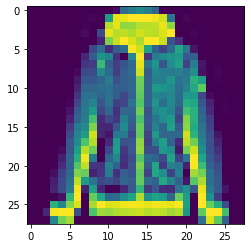

5628
1.0
[1.2540952e-10 1.4307674e-16 3.9646828e-08 2.1514189e-17 1.0000000e+00
 4.1905383e-18 5.2071274e-11 1.2720623e-21 3.2662810e-13 1.1128066e-20]


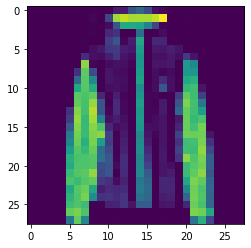

3777
0.9999999
[1.6987681e-15 1.6317008e-17 2.4839727e-10 5.8315312e-21 9.9999988e-01
 6.5365884e-21 7.9587792e-08 2.7005187e-27 1.9878903e-20 1.5621703e-21]


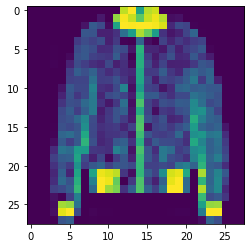

6143
0.9999999
[1.5849343e-14 2.5263904e-16 1.4411377e-07 2.4992771e-20 9.9999988e-01
 1.5225659e-18 7.1563833e-10 4.5055590e-26 8.7546590e-15 1.0369366e-21]


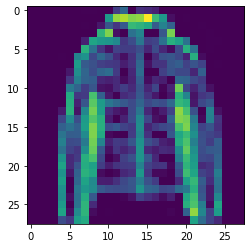

5965
0.99999976
[2.64672030e-12 6.66591049e-08 9.64801075e-08 1.55351149e-10
 9.99999762e-01 1.09133015e-17 1.19971389e-07 1.08763019e-19
 8.24514940e-18 3.49830630e-19]


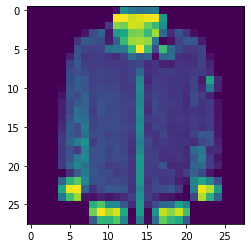

8944
0.99999976
[9.0512403e-11 2.3159740e-11 3.3051247e-08 1.1842054e-09 9.9999976e-01
 7.3468911e-16 2.3542722e-07 8.6854970e-16 1.3726004e-12 2.4485676e-16]


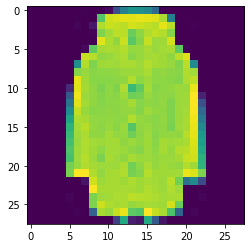

Class 5: 
8
1.0
[1.8255599e-15 2.1845558e-33 1.6400644e-23 6.6906419e-25 2.6059558e-27
 1.0000000e+00 1.3731640e-19 1.7763962e-19 7.5896812e-17 1.7809484e-27]


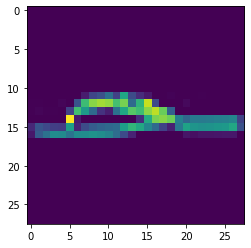

23
1.0
[1.6975115e-15 5.5972023e-23 1.7422064e-16 4.5106869e-25 4.9008173e-21
 1.0000000e+00 1.0132321e-15 8.5288954e-14 7.8687599e-15 2.2194649e-11]


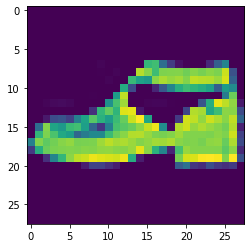

37
1.0
[2.5599051e-11 8.2903737e-19 1.7912871e-13 4.8478514e-14 1.8855070e-16
 1.0000000e+00 2.6098108e-12 6.0376864e-12 6.9621010e-11 2.9519464e-14]


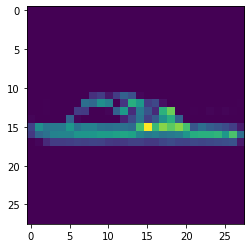

52
1.0
[1.8221953e-27 0.0000000e+00 5.7321995e-34 7.4249006e-33 0.0000000e+00
 1.0000000e+00 1.6158895e-29 6.9145181e-32 2.6568646e-29 2.6944781e-35]


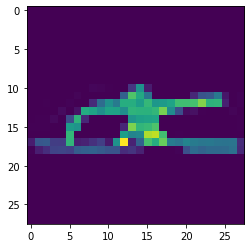

63
1.0
[4.3831136e-17 2.8627290e-33 2.2037364e-21 7.2446069e-33 3.3843221e-24
 1.0000000e+00 3.4102350e-20 1.7741402e-20 3.4591091e-18 3.2389922e-23]


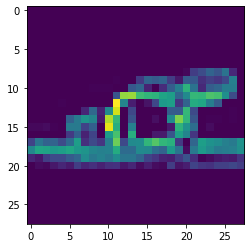

82
1.0
[3.5101011e-32 0.0000000e+00 6.1002315e-30 0.0000000e+00 0.0000000e+00
 1.0000000e+00 1.3623418e-28 1.3745650e-24 3.9023769e-26 1.2304759e-23]


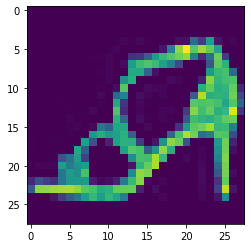

Class 6: 
3966
1.0
[1.0968016e-10 3.1900644e-24 4.8025121e-12 6.0655174e-15 1.0785263e-08
 8.8436678e-17 1.0000000e+00 7.1152479e-19 3.0935437e-17 2.6555116e-18]


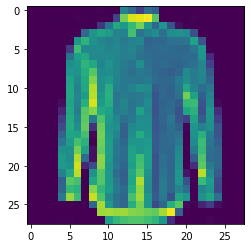

5371
1.0
[5.1999000e-12 1.6207278e-31 2.0022931e-13 1.0321738e-20 1.2285932e-11
 4.9652657e-22 1.0000000e+00 1.0078177e-27 5.0547468e-21 2.2082963e-22]


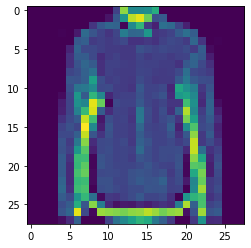

7348
1.0
[2.62253397e-09 6.59580508e-20 1.10793055e-10 5.63443118e-13
 5.92387738e-16 8.76985659e-14 1.00000000e+00 2.19307859e-20
 1.54073938e-15 9.83122356e-17]


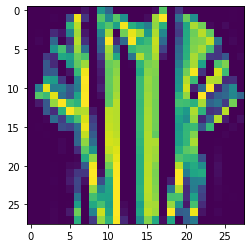

9962
1.0
[1.5868180e-08 2.3171181e-23 5.3364659e-09 9.0567240e-13 3.8654910e-08
 3.2825264e-16 1.0000000e+00 2.3597636e-17 5.1316022e-15 4.7555770e-16]


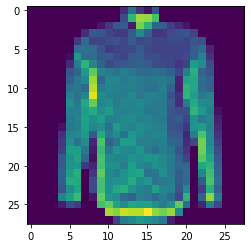

3470
0.9999999
[1.8683004e-10 3.5477861e-21 8.2357365e-10 3.6944661e-13 1.3530504e-07
 4.1196965e-14 9.9999988e-01 3.8103417e-15 1.7584329e-14 5.4480774e-15]


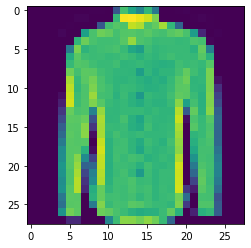

3637
0.9999999
[2.7083261e-10 1.2337289e-22 1.1882716e-09 6.0944888e-14 1.6315629e-07
 3.8455166e-16 9.9999988e-01 1.7284035e-17 2.4925996e-15 1.0179735e-16]


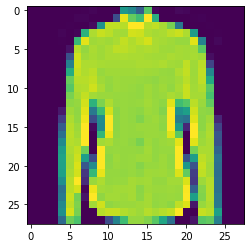

Class 7: 
36
1.0
[7.6130452e-19 3.6116729e-32 4.4231641e-21 1.3751819e-27 8.3277943e-22
 6.3440358e-15 8.2156257e-21 1.0000000e+00 3.0227234e-17 2.8287700e-20]


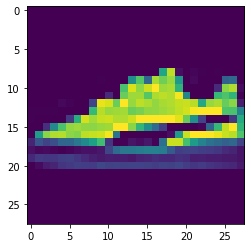

184
1.0
[1.4908104e-09 1.6770404e-19 7.3795424e-13 5.1936168e-15 1.2994040e-15
 2.1780972e-08 1.1050866e-12 1.0000000e+00 3.2545883e-10 7.5037215e-13]


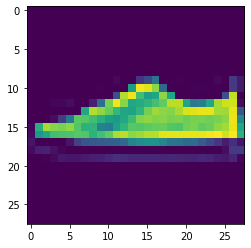

189
1.0
[7.0467486e-11 1.3375932e-20 4.8405191e-16 1.6427939e-16 2.7555721e-17
 8.0791102e-10 2.5545164e-14 1.0000000e+00 1.9060998e-12 1.0425919e-15]


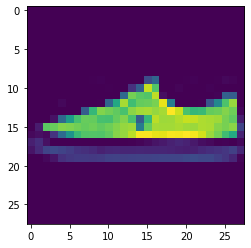

224
1.0
[2.1398389e-08 1.2072608e-16 5.9174978e-12 1.1255813e-11 6.2465748e-11
 8.0755358e-10 3.2311154e-10 1.0000000e+00 3.8699595e-09 3.6003802e-09]


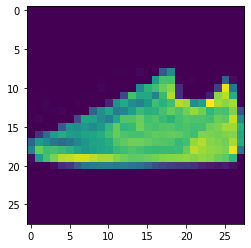

228
1.0
[1.8235843e-10 6.9475996e-23 1.2627291e-17 7.0966869e-17 9.3935573e-16
 8.2714414e-14 2.5861778e-13 1.0000000e+00 2.8648530e-11 6.6438207e-17]


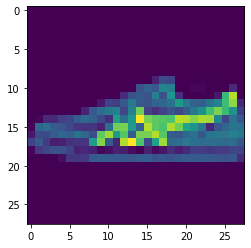

308
1.0
[1.2306079e-11 3.6394598e-31 2.4006659e-18 8.0861809e-30 1.2204819e-22
 1.3177752e-09 8.9394102e-19 1.0000000e+00 2.4682237e-13 3.6218695e-24]


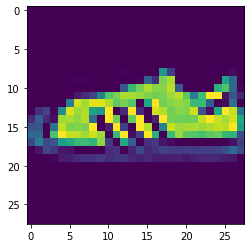

Class 8: 
30
1.0
[1.0757717e-26 0.0000000e+00 1.9277584e-28 1.7653378e-34 1.8041420e-28
 4.7658599e-22 2.4668779e-24 8.0030898e-35 1.0000000e+00 4.0242410e-33]


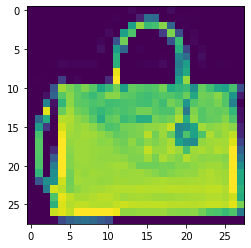

31
1.0
[3.4827992e-24 6.0041200e-38 2.3824037e-24 4.5695488e-27 5.9390702e-20
 3.2607715e-17 9.5726065e-26 1.5328260e-29 1.0000000e+00 1.6277827e-34]


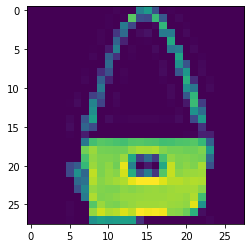

34
1.0
[7.0505984e-17 3.6016568e-32 7.6126076e-12 1.4250315e-24 5.5149207e-10
 4.1886571e-16 2.9275791e-17 3.0576318e-24 1.0000000e+00 1.8262463e-26]


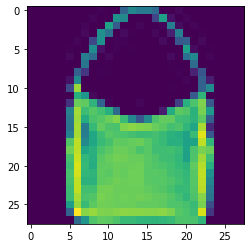

56
1.0
[4.1278027e-12 1.9198403e-20 1.3813132e-18 1.5027324e-20 4.5304412e-21
 2.2889031e-13 6.5032132e-13 1.9583056e-14 1.0000000e+00 2.0204853e-13]


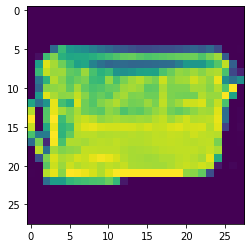

62
1.0
[7.0119036e-22 0.0000000e+00 3.5992284e-23 4.0548119e-26 6.9253883e-26
 6.9715072e-19 4.8587111e-21 2.3322033e-22 1.0000000e+00 1.3861931e-22]


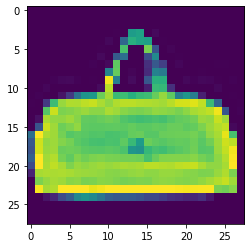

69
1.0
[6.6195973e-21 0.0000000e+00 6.4768383e-23 4.6155645e-30 2.4276413e-24
 2.9184237e-25 8.0412416e-22 2.9560873e-29 1.0000000e+00 1.6605134e-28]


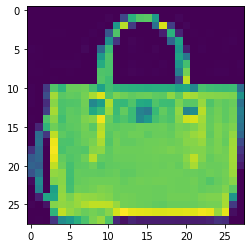

Class 9: 
0
1.0
[2.40267506e-12 1.93273926e-17 2.96927671e-14 5.09333617e-16
 2.45011930e-16 1.36792189e-09 6.51019169e-12 1.06798348e-09
 1.04846396e-13 1.00000000e+00]


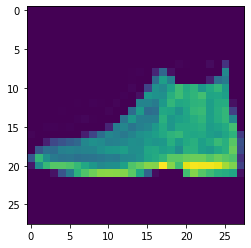

39
1.0
[7.9003309e-10 1.9128357e-14 1.3006160e-12 1.7957104e-13 6.2928619e-16
 2.9961006e-10 1.1209206e-09 8.1258484e-09 2.6737933e-14 1.0000000e+00]


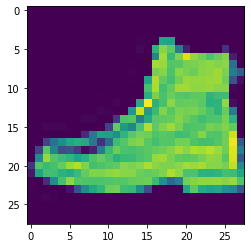

83
1.0
[9.2950751e-11 2.4669644e-15 1.7859865e-12 4.5416436e-14 3.2116267e-17
 1.4903689e-10 2.6444530e-10 4.4489489e-08 1.6272475e-13 1.0000000e+00]


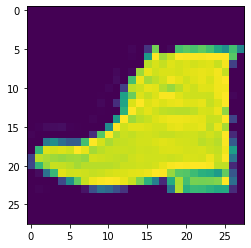

123
1.0
[1.6258825e-13 6.5305288e-22 1.3229408e-16 4.9771017e-21 9.1084547e-20
 1.8781661e-13 7.7650248e-14 6.9472744e-10 2.8557403e-16 1.0000000e+00]


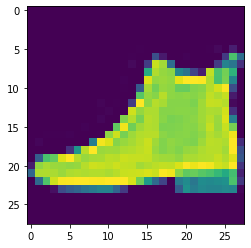

158
1.0
[4.3765203e-14 5.1124464e-18 4.4074774e-16 4.3636089e-18 1.0748028e-20
 4.2349674e-13 7.5232827e-13 6.4118029e-12 9.6859329e-17 1.0000000e+00]


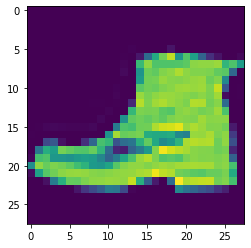

165
1.0
[4.5825904e-19 1.4999429e-28 1.0574686e-22 1.5866504e-28 1.1760259e-28
 7.9454222e-18 7.0312534e-19 1.6902920e-17 7.9244475e-25 1.0000000e+00]


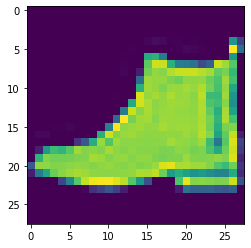

In [ ]:
# compute predictions (i.e., probability distributions) on test data
Y_hat = model.predict(X_test)

import math
# define function to compute entropy
def entropy(p):
    return -sum([prob*(0.0 if prob == 0.0 else math.log2(prob)) for prob in p])

# load original MNIST data
(X_train_original, y_train_original), (X_test_original, y_test_original) = fashion_mnist.load_data()

for i in range(0,10):
  column = Y_hat[:, i]

  # sort test data points in descending order of probabilities
  indices = list(range(0, len(column)))
  indices.sort(key = lambda i : -column[i])
  
  print("Class %d: " % i)
  # show five most prototypical images
  for i in range(0, 6):
      print(indices[i])
      print(column[indices[i]])
      print(Y_hat[indices[i]])
      plt.imshow(X_test_original[indices[i]])
      plt.show()


8658
2.562896993700847
[0.27488908 0.00665912 0.09774704 0.15416342 0.16330166 0.00397025
 0.22450371 0.00261434 0.06862976 0.00352169]


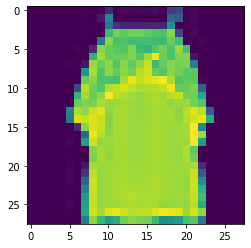

9101
2.5530758599374463
[0.16276194 0.02821707 0.11821312 0.3190451  0.1498766  0.00496715
 0.18398736 0.00302235 0.02588513 0.00402417]


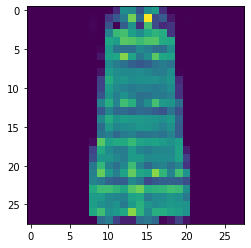

2498
2.5335894411222557
[0.12231182 0.01657394 0.1444349  0.29887283 0.21645659 0.00587001
 0.1627147  0.00220366 0.02543627 0.00512526]


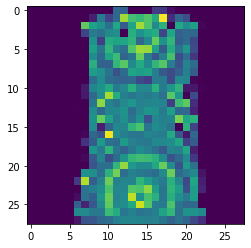

5148
2.4975335822276246
[0.12395016 0.00626686 0.09209909 0.18871227 0.18968068 0.00324932
 0.3288032  0.00354802 0.06099055 0.00269986]


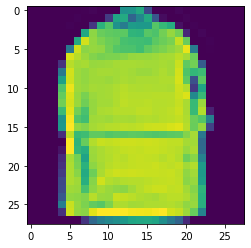

7210
2.4666264150373687
[0.08687718 0.01631223 0.25774962 0.23327392 0.24944818 0.00197705
 0.12295938 0.00220695 0.02679444 0.00240104]


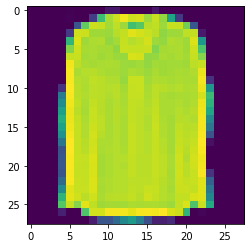

3051
2.4495742491610843
[0.2663207  0.03284184 0.15179987 0.2060469  0.10573668 0.00074985
 0.22916247 0.00047451 0.00560076 0.00126637]


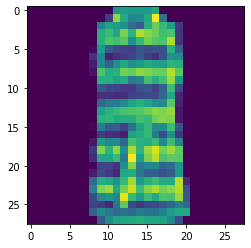

5197
2.4391977232203006
[0.14336473 0.00092591 0.24957415 0.10906804 0.26202735 0.00446493
 0.1999112  0.00215952 0.0269209  0.00158326]


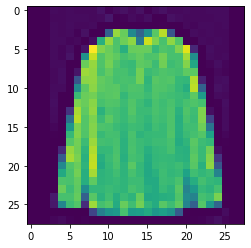

5121
2.4023210377307196
[0.14748476 0.00682558 0.35624608 0.13521841 0.17967057 0.0034418
 0.15032744 0.00313483 0.01438913 0.00326135]


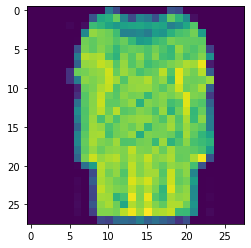

3499
2.3907388483560386
[0.19186868 0.00023157 0.17415752 0.20892903 0.18666649 0.00149034
 0.22725745 0.00038651 0.00859163 0.00042079]


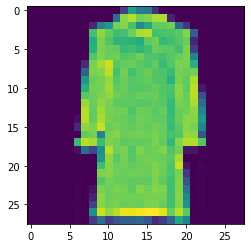

8005
2.3887773862366264
[3.2438028e-01 3.8259350e-02 6.3121580e-02 1.5529166e-01 2.3195432e-01
 3.0398357e-04 1.7445043e-01 1.1174850e-04 1.1778157e-02 3.4848697e-04]


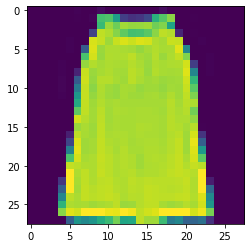

In [ ]:
# compute predictions (i.e., probability distributions) on test data
Y_hat = model.predict(X_test)

import math
# define function to compute entropy
def entropy(p):
    return -sum([prob*(0.0 if prob == 0.0 else math.log2(prob)) for prob in p])

# compute entropy for each data point in the test data
entropies = np.apply_along_axis(entropy, 1, Y_hat)

# sort test data points in descending order of entropy
indices = list(range(0, len(Y_hat)))
indices.sort(key = lambda i : -entropies[i])

# load original MNIST data
(X_train_original, y_train_original), (X_test_original, y_test_original) = fashion_mnist.load_data()

# show top-10 confusing images
for i in range(0, 10):
    print(indices[i])
    print(entropies[indices[i]])
    print(Y_hat[indices[i]])
    plt.imshow(X_test_original[indices[i]])
    plt.show()

## 4.2 Using a CNN to Classify Images from 10 Classes
Another dataset included with Keras is CIFAR10, which consist of RGB images belonging to 10 different
classes. It is available in Keras via the function tf.keras.datasets.cifar10.load_data() We
want to adapt the CNN used to classify cats and dogs from Chapter 4.5 to tackle this task.

(a) Modify the code to use the CIFAR 10 dataset and determine the accuracy on the test data.

(b) Extend the code to make use of data augmentation and determine the accuracy on the test
data.

(c) Modify the code that uses the pre-trained VGG16 network to use the CIFAR 10 dataset and
determine the accuracy on the test data.

(d) Keras also includes other pre-trained networks. A list of them can be found at:
https://keras.io/api/applications/.
Pick one of the other available pre-trained networks and check whether using it yields an
improvement over the accuracy achieved in (b) and (c)

In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# reshape and normalize the data
X_train = X_train.reshape((50000, 32, 32, 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 32, 32, 3))
X_test = X_test.astype('float32') / 255

# one-hot encode the class labels (0-9)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


# define the architecture of our neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 128)      

before


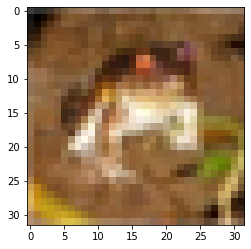

after


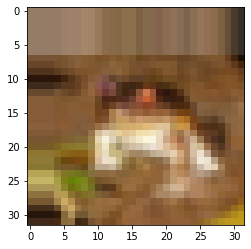

before


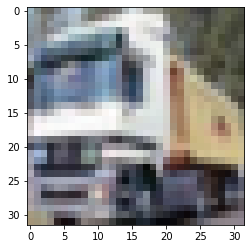

after


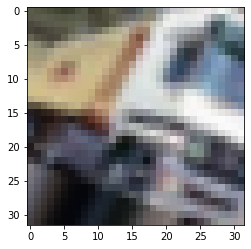

before


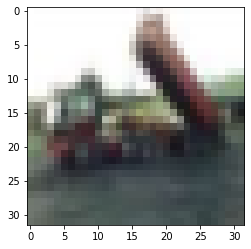

after


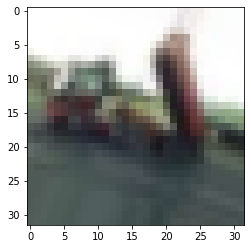

before


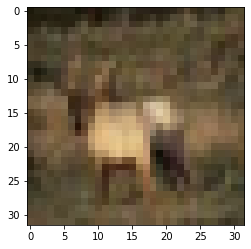

after


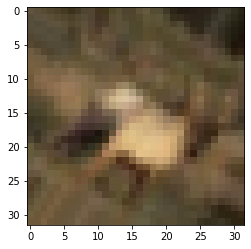

before


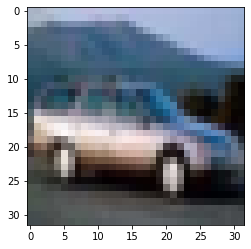

after


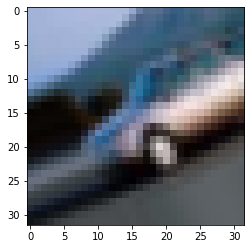

before


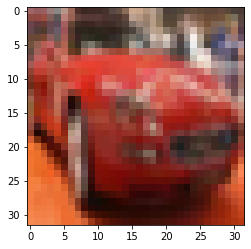

after


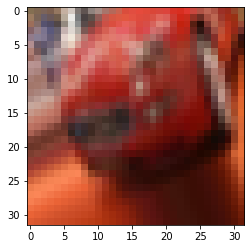

before


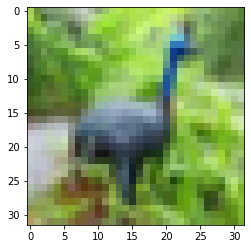

after


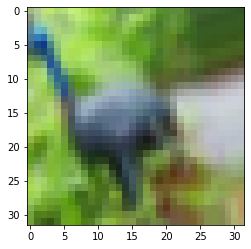

before


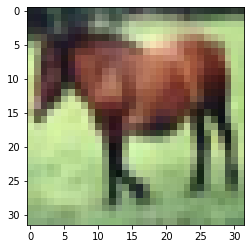

after


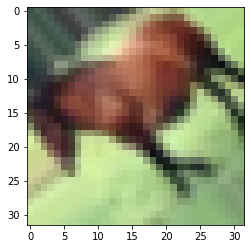

before


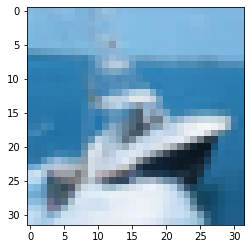

after


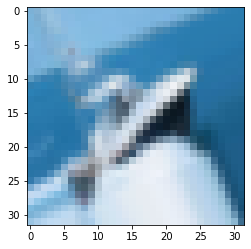

before


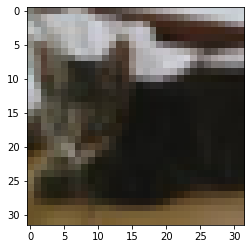

after


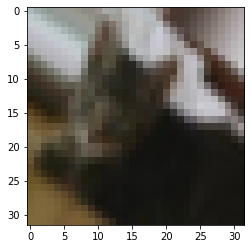

In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

samples = X_train[:10]

simple = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,)

my_tg = simple.flow(X_train, 
                           #y_train,
                           shuffle=False,
                           batch_size=1)

for i in range(0,10):
    print("before")
    plt.imshow(samples[i])
    plt.show()
    print("after")
    batch = my_tg.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.show()

In [ ]:
import sys
from keras.utils import np_utils
from matplotlib import pyplot
from keras.datasets import cifar10
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
 
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = np_utils.to_categorical(trainY, 10)
  testY = np_utils.to_categorical(testY, 10)
  return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
  model = Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same',))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same',))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
  model.summary()
  return model
  
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  # prepare iterator
  it_train = datagen.flow(trainX, trainY, batch_size=64)
  # fit model
  history = model.fit(it_train, steps_per_epoch=625, epochs=10, validation_data=(testX, testY), verbose=1)
  # evaluate model
  score = model.evaluate(testX, testY, verbose=0)
  print("Test score:", score[0])
  print("Test accuracy:", score[1])
 
# entry point, run the test harness
run_test_harness()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from keras.applications import vgg16

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# reshape and normalize the data
X_train = X_train.reshape((50000, 32, 32, 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 32, 32, 3))
X_test = X_test.astype('float32') / 255

# one-hot encode the class labels (0-9)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# download VGG16 model for image classification, but exclude classification head
conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3),
                  classifier_activation="softmax")

# define the architecture of the neural network building on VGG15
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()


# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 1024)              525312    
                                                                 
 dense_29 (Dense)            (None, 10)                10250     
                                                                 
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.2199 - acc: 0.5133 - val_loss: 0.1994 - val_acc: 0.5629
Epoch 2/10
625/625 [=============

In [ ]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from keras.applications import densenet

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# reshape and normalize the data
X_train = X_train.reshape((50000, 32, 32, 3))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 32, 32, 3))
X_test = X_test.astype('float32') / 255

# one-hot encode the class labels (0-9)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# download DenseNet201 model for image classification, but exclude classification head
conv_base = densenet.DenseNet201(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3),
                  classes=10)

# define the architecture of the neural network building on VGG15
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.summary()


# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 flatten_17 (Flatten)        (None, 1920)              0         
                                                                 
 dense_34 (Dense)            (None, 1024)              1967104   
                                                                 
 dense_35 (Dense)            (None, 10)                10250     
                                                                 
Total params: 20,299,338
Trainable params: 1,977,354
Non-trainable params: 18,321,984
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 37s 39ms/step - loss: 0.2072 - acc: 0.5492 - v

## 4.3 Using a CNN to Classify Movie Reviews
CNNs are not limited to image data. We now want to make use of a CNN to classify the IMDB movie
reviews that we saw in Chapter 3. To do this, we’ll make use of word embeddings, which will be
discussed later in the lecture. Word embeddings provide us with a learnt vector for each word. We will
use the GloVe embeddings provided by Stanford University. Details about GloVe can be found at:

https://nlp.stanford.edu/projects/glove/.

We will represent movie reviews as a column-wise concatenation of the word embeddings for the first k
words in them. Thus, each review is represented as a 100× k matrix. Note that for movie reviews that
are shorter or longer than k words, we need to apply padding or truncation. The following page from
the Keras documentation includes details on how to use the 100-dimensional GloVe embeddings:

https://keras.io/examples/nlp/pretrained_word_embeddings/.


(a) Preprocess the IMDB movie reviews as explained above using k = 100.

(b) Implement a CNN with a suitable architecture that makes use of the preprocessed IMDB movie
reviews and determine its accuracy on the test data.

In [68]:
import array
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras.layers import TextVectorization


# number of most frequent words to consider
num_words = 5000

# load IMDB dataset using only the 5,000 most frequent words
(train_data, train_labels), (x_test, y_test) = imdb.load_data(num_words=num_words)

# let us print out one of the reviews (? indicates a non-frequent word)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Example review:\n" + decoded_review)

# for this example, we use a simple representation of reviews as binary 5,000-dimensional vectors
def decode_reviews(reviews):
    results = np.empty(len(reviews), dtype=object)
    c = 0
    for review in reviews:
        decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in reviews[c]])
        results[c] = decoded_review
        c = c + 1
    return results

train_data = decode_reviews(train_data)
x_test = decode_reviews(x_test)

# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(train_data)
rng = np.random.RandomState(seed)
rng.shuffle(train_labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(train_data))
x_train = train_data[:-num_validation_samples]
x_val = train_data[-num_validation_samples:]
y_train = train_labels[:-num_validation_samples]
y_val = train_labels[-num_validation_samples:]

vectorizer = TextVectorization(max_tokens=num_words, output_sequence_length=100)
text_ds = tf.data.Dataset.from_tensor_slices(x_train).batch(128)
vectorizer.adapt(text_ds)

print("Top 5 words:")
print(vectorizer.get_vocabulary()[:5])

s = "the cat sat on the mat"
print("Vectorized test sequence -> '%s':" % s)
output = vectorizer([[s]])
print(output.numpy()[0, :6])

x_train = vectorizer(np.array([[s] for s in x_train])).numpy()
x_val = vectorizer(np.array([[s] for s in x_val])).numpy()
x_test = vectorizer(np.array([[s] for s in x_test])).numpy()

Example review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the

In [69]:
import zipfile
#from google.colab import drive
#drive.mount('/content/gdrive')

#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q "/content/gdrive/My Drive/glove.6B.zip"

# After downloading:
globe_path = "glove.6B.100d.txt"
embeddings_index = {}
with open(globe_path) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

from keras import layers
from keras.layers import Embedding
from keras import Model
from keras.initializers import Constant
from keras import Input

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False,
)

int_sequences_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
model = models.Sequential()
x = layers.Conv1D(128, 3, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(1, activation='sigmoid')(x)
model = Model(int_sequences_input, preds)
model.summary()

model.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

# compute loss and accuracy on test data
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])



Found 400000 word vectors.
Converted 4951 words (15 misses)
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_18 (Embedding)    (None, None, 100)         496800    
                                                                 
 conv1d_44 (Conv1D)          (None, None, 128)         38528     
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, None, 128)        0         
 g1D)                                                            
                                                                 
 conv1d_45 (Conv1D)          (None, None, 128)         49280     
                                                                 
 global_max_pooling1d_18 (Gl  (None, 128)              0        